# with `plottable`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from plottable import Table, ColumnDefinition
from plottable.formatters import decimal_to_percent
from plottable.plots import bar


In [3]:
df = pd.read_pickle('./table1.pickle')
df.round(2)

,Entry_All_TO_value,Entry_Mono_TO_value,Entry_Xsell_TO_value,SOE,Repeat_Rate,Repeat_TO_value,Entry_All_TO_evol,Entry_Mono_TO_evol,Entry_Xsell_TO_evol,SOE_evol,Repeat_Rate_evol,Repeat_TO_evol
sous_cat_HB,,,,,,,,,,,,
A_BOY_HB,4950.72,4762.50,6411.75,0.07,0.36,6664.24,-0.03,0.00,-0.19,-0.67,-0.67,-0.07
B_TCL_HB,5688.93,5499.52,7015.53,0.05,0.32,5886.47,0.02,0.03,-0.05,0.22,0.85,0.16
C_2_55_HB,6129.70,5757.28,8134.51,0.01,0.34,7554.83,-0.06,-0.07,-0.06,-0.23,-4.54,-0.13
D_GABRIELLE_HB,4358.70,4162.86,5879.78,0.05,0.43,8959.05,0.05,0.05,0.03,-0.67,20.31,1.09
E_COCO_HANDLE,4289.29,4076.59,5516.71,0.01,0.36,10845.39,-0.12,-0.12,-0.19,0.54,-4.89,-0.02
F_NOVELTIES_HB,4690.55,4169.20,6935.45,0.08,0.36,7695.54,0.02,-0.01,0.00,-0.23,0.64,0.04
G_ANIMATION_HB,4295.82,3905.85,6191.96,0.10,0.39,7721.76,-0.05,-0.07,-0.04,0.87,3.68,0.22
H_CHANEL_19,5451.40,4894.55,8160.39,0.01,NaN,NaN,NaN,NaN,NaN,0.53,NaN,NaN
Z_OTHER_HB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns.to_list()

['Entry_All_TO_value',
 'Entry_Mono_TO_value',
 'Entry_Xsell_TO_value',
 'SOE',
 'Repeat_Rate',
 'Repeat_TO_value',
 'Entry_All_TO_evol',
 'Entry_Mono_TO_evol',
 'Entry_Xsell_TO_evol',
 'SOE_evol',
 'Repeat_Rate_evol',
 'Repeat_TO_evol']

In [5]:
cols = [
    'Entry_All_TO_value',
    'Entry_Mono_TO_value',
    'Entry_Xsell_TO_value',
    'Entry_All_TO_evol',
    'SOE',
    'SOE_evol',
    'Repeat_Rate',
    'Repeat_Rate_evol',
    'Repeat_TO_value',
    'Repeat_TO_evol',
    # 'Entry_Mono_TO_evol',
    # 'Entry_Xsell_TO_evol',
]

In [6]:
# Define the custom colormap
from matplotlib.colors import ListedColormap, BoundaryNorm

colors = ['darkred', 'dimgray', 'darkgreen']
lcmap = ListedColormap(colors)

# Define the boundaries for the colormap
boundaries = [-np.inf, -0.05, 0.05, np.inf]
norm = BoundaryNorm(boundaries, lcmap.N)


display(lcmap(norm(0)))
display(df["Entry_All_TO_evol"].map(lambda x: lcmap(norm(x))))

(np.float64(0.4117647058823529),
 np.float64(0.4117647058823529),
 np.float64(0.4117647058823529),
 np.float64(1.0))

sous_cat_HB
A_BOY_HB          (0.4117647058823529, 0.4117647058823529, 0.411...
B_TCL_HB          (0.4117647058823529, 0.4117647058823529, 0.411...
C_2_55_HB                       (0.5450980392156862, 0.0, 0.0, 1.0)
D_GABRIELLE_HB    (0.4117647058823529, 0.4117647058823529, 0.411...
E_COCO_HANDLE                   (0.5450980392156862, 0.0, 0.0, 1.0)
F_NOVELTIES_HB    (0.4117647058823529, 0.4117647058823529, 0.411...
G_ANIMATION_HB                  (0.5450980392156862, 0.0, 0.0, 1.0)
H_CHANEL_19                    (0.0, 0.39215686274509803, 0.0, 1.0)
Z_OTHER_HB                     (0.0, 0.39215686274509803, 0.0, 1.0)
Name: Entry_All_TO_evol, dtype: object

In [7]:
plt.rcParams['svg.fonttype'] = 'none'


In [8]:
def kdollar(x):
    return f"${x/1000:,.1f}k"

def percentage_points(x):
    return f"{x*100:+.0f}ₚₚ"

def pct(x):
    return f"{x:.0%}"

In [11]:
col_defs = [
    ColumnDefinition(name="sous_cat_HB",          title='', width=1.25), 
    ColumnDefinition(name="Entry_All_TO_value",   title='All',   group="Entry T.O.", width=0.75, formatter=kdollar), 
    ColumnDefinition(name="Entry_Mono_TO_value",  title='Mono',  group="Entry T.O.", width=0.75, formatter=kdollar),
    ColumnDefinition(name="Entry_Xsell_TO_value", title='XSell', group="Entry T.O.", width=0.75, formatter=kdollar),
    ColumnDefinition(name="Entry_All_TO_evol",    title='evol.', text_cmap=lambda v: lcmap(norm(v)), group="Entry T.O.", width=0.75, formatter=pct,),
    ColumnDefinition(
        "SOE",
        group="Share of entry",
        title='',
        width=1.25,
        plot_fn=bar,
        plot_kw={
            "annotate": True,
            "height": 0.95,
            "lw": 0.,
            'xlim': (0, min(df['SOE'].max()*1.1, 1)),
            "formatter": decimal_to_percent,
            "color": "#d2b496",
        },
    ),
    ColumnDefinition(name="SOE_evol", title='vs LY.', group="Share of entry", width=0.75, text_cmap=lambda v: lcmap(norm(v)), formatter=percentage_points, textprops={'family': 'sans-serif'}),
    ColumnDefinition(
        "Repeat_Rate", 
        title=' ',
        group="Repeat Rate", 
        width=1.25,
        plot_fn=bar,
        plot_kw={
            "annotate": True,
            "height": 0.95,
            "lw": 0.,
            'xlim': (0, min(df['Repeat_Rate'].max()*1.1, 1)),
            "formatter": decimal_to_percent,
            "color": "#d2b496",
        },
    ),
    ColumnDefinition(name="Repeat_Rate_evol", title='vs LY.', group="Repeat Rate", text_cmap=lambda v: lcmap(norm(v)), formatter=percentage_points, textprops={'family': 'sans-serif'}, width=0.75),
    ColumnDefinition(name="Repeat_TO_value", title=' ', group="Repeat TO",  formatter=kdollar),
    ColumnDefinition(name="Repeat_TO_evol", title='vs LY.', group="Repeat TO", text_cmap=lambda v: lcmap(norm(v)), formatter=pct, width=0.75),

]

(np.float64(9.05), np.float64(-2.025)) -1


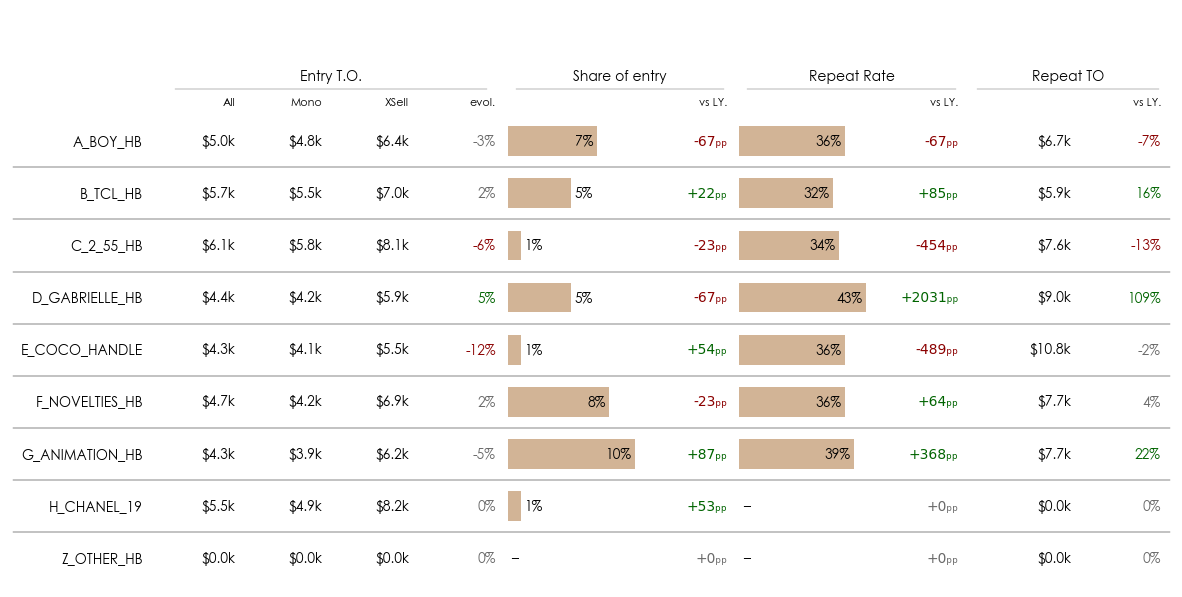

In [14]:
fig, ax = plt.subplots(figsize=(15, 7.5))
plt.rcParams['font.family'] = 'Century Gothic'
# plt.grid(linestyle='--')

tab = Table(
    df[cols].round(2).fillna(0), 
    column_definitions=col_defs,
    col_label_divider=False,    
    col_label_cell_kw={'height': 0.5},
    row_divider_kw={'linewidth': 0.335, 'color': 'k'},
    # textprops={"va": "top"},
)

# for cell in tab.col_label_row.cells:
#     cell.rectangle_patch.set_height(0.25)

tab.col_label_row.set_fontfamily('Century Gothic')
tab.col_label_row.set_fontsize(8)
# tab.col_label_row.set_facecolor("#f0f")

for i, row in enumerate(tab.rows):
    # tab.rows[row].set_edgecolor("#f00")
    # tab.rows[row].set_facecolor("#ff0")
    tab.rows[row].set_linewidth(0.75)

print(ax.get_ylim(), tab.col_label_row.index)


plt.savefig('test.svg', bbox_inches='tight', pad_inches=0.01)
# plt.show()